# HANDWRITTEN DIGITS DATASET

**File:** HandwrittenDigits.ipynb


# IMPORT LIBRARIES

In [25]:
!pip install numpy
!pip install pandas
import pandas as pd                                   # For dataframes
import numpy as np                                    # For various functions
import matplotlib.pyplot as plt                       # For plotting functions
import seaborn as sns                                 # For additional plotting functions
from sklearn.model_selection import train_test_split  # For train/test splits

In [27]:
df = pd.read_csv('optdigits_raw.csv')
print(df)

      0  1   2   3   4   5  6  7  8  9  ...  55  56  57  58  59  60  61  62  \
0     0  1   6  15  12   1  0  0  0  7  ...   0   0   0   6  14   7   1   0   
1     0  0  10  16   6   0  0  0  0  7  ...   0   0   0  10  16  15   3   0   
2     0  0   8  15  16  13  0  0  0  1  ...   0   0   0   9  14   0   0   0   
3     0  0   0   3  11  16  0  0  0  0  ...   0   0   0   0   1  15   2   0   
4     0  0   5  14   4   0  0  0  0  0  ...   0   0   0   4  12  14   7   0   
...  .. ..  ..  ..  ..  .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..  ..   
3818  0  0   5  13  11   2  0  0  0  2  ...   0   0   0   8  13  15  10   1   
3819  0  0   0   1  12   1  0  0  0  0  ...   0   0   0   0   4   9   0   0   
3820  0  0   3  15   0   0  0  0  0  0  ...   0   0   0   4  14  16   9   0   
3821  0  0   6  16   2   0  0  0  0  0  ...   0   0   0   5  16  16  16   5   
3822  0  0   2  15  16  13  1  0  0  0  ...   0   0   0   4  14   1   0   0   

      63  64  
0      0   0  
1      0   0  
2     

In [28]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [29]:
df.columns = ["P" + str(i) for i in range(0, len(df.columns) - 1)] + ["y"]

In [30]:
df = df.loc[df.y.isin([1, 3, 6])]

df.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P55,P56,P57,P58,P59,P60,P61,P62,P63,y
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
11,0,0,0,3,16,11,1,0,0,0,...,0,0,0,0,2,14,14,1,0,1
14,0,0,7,11,11,6,0,0,0,9,...,0,0,0,14,16,12,10,1,0,3
24,0,0,9,13,1,0,0,0,0,0,...,5,0,0,4,15,16,16,16,16,1
27,0,0,0,10,12,0,0,0,0,0,...,0,0,0,1,11,14,12,1,0,6


In [31]:
# Renames columns
X_trn, X_tst, y_trn, y_tst = train_test_split(
    df.filter(regex='\d'),  
    df.y, 
    test_size=0.30,
    random_state=1)

# Creates the training dataset, trn
trn = X_trn
trn["y"] = y_trn

# Creates the testing dataset, tst
tst = X_tst
tst["y"] = y_tst

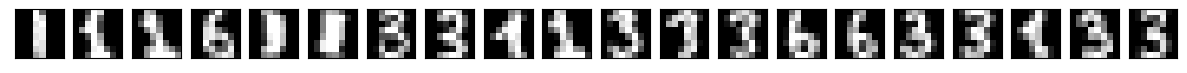

In [32]:
# Sets up a grid for the images
fig, ax = plt.subplots(
    nrows=1, 
    ncols=20, 
    figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))

# Plots 20 digits
for i in np.arange(20):
    ax[i].imshow(X_trn.to_numpy()[i, 0:-1].reshape(8, 8), cmap=plt.cm.gray)   
plt.show()

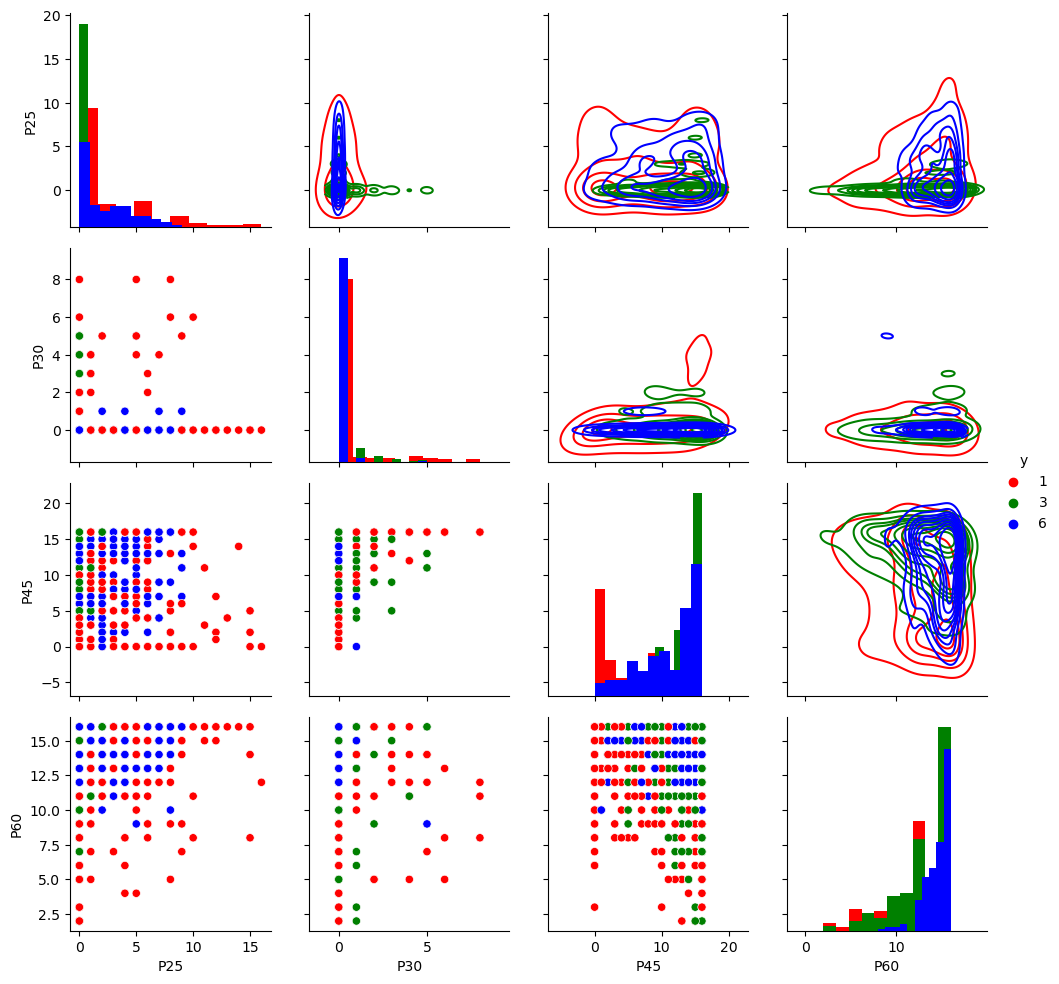

In [19]:
# Creates a grid using Seaborn's PairGrid()
g = sns.PairGrid(
    trn, 
    vars=["P25", "P30", "P45", "P60"], 
    hue="y", 
    diag_sharey=False, 
    palette=["red", "green", "blue"])

# Adds histograms on the diagonal
g.map_diag(plt.hist)

# Adds density plots above the diagonal
g.map_upper(sns.kdeplot)

# Adds scatterplots below the diagonal
g.map_lower(sns.scatterplot)

# Adds a legend
g.add_legend()

In [34]:
# Saving
df.to_csv('optdigits.csv', sep=',', index=False)
trn.to_csv('optdigits_trn.csv', sep=',' ,index=False)
tst.to_csv('optdigits_tst.csv', sep=',' ,index=False)